In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set()
sns.set_context(
    "notebook",
    font_scale=1.5,
    rc={
        "figure.figsize": (11, 8),
        "axes.titlesize": 18
    }
)

rcParams['figure.figsize'] = 11, 8

In [4]:
df = pd.read_csv(
    'mlbootcamp5_train.csv', sep=';')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


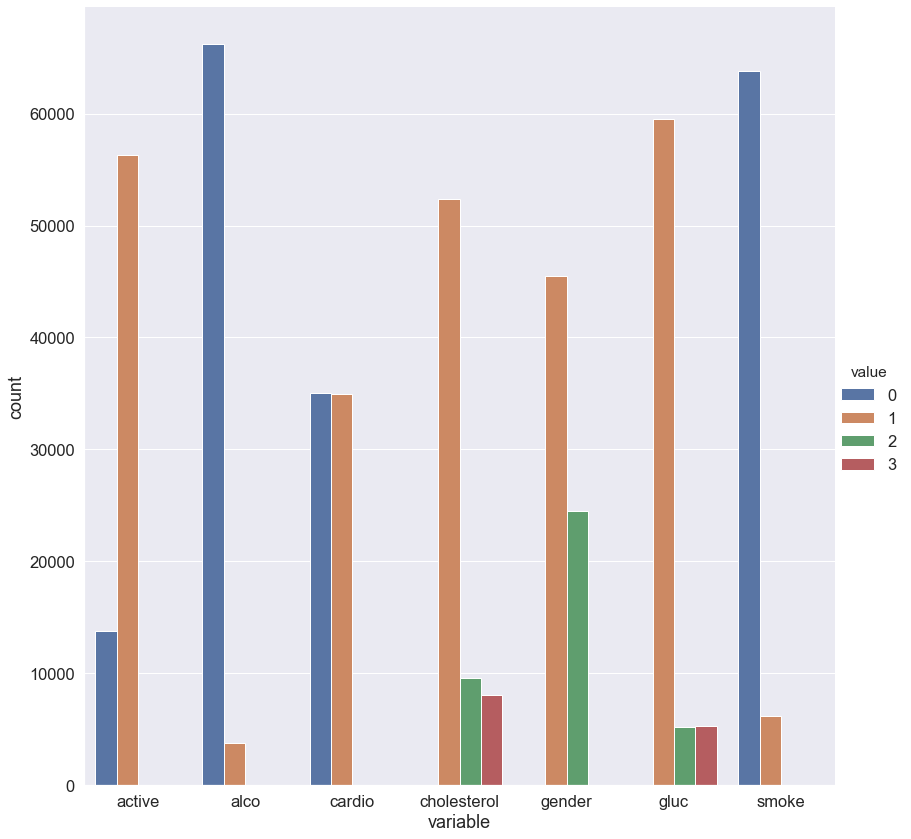

In [5]:
df_uniques = pd.melt(frame=df, value_vars=['gender', 'cholesterol',
                                           'gluc', 'smoke', 'alco',
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable',
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.catplot(x='variable', y='count', hue='value',
            data=df_uniques, kind='bar', height=12)

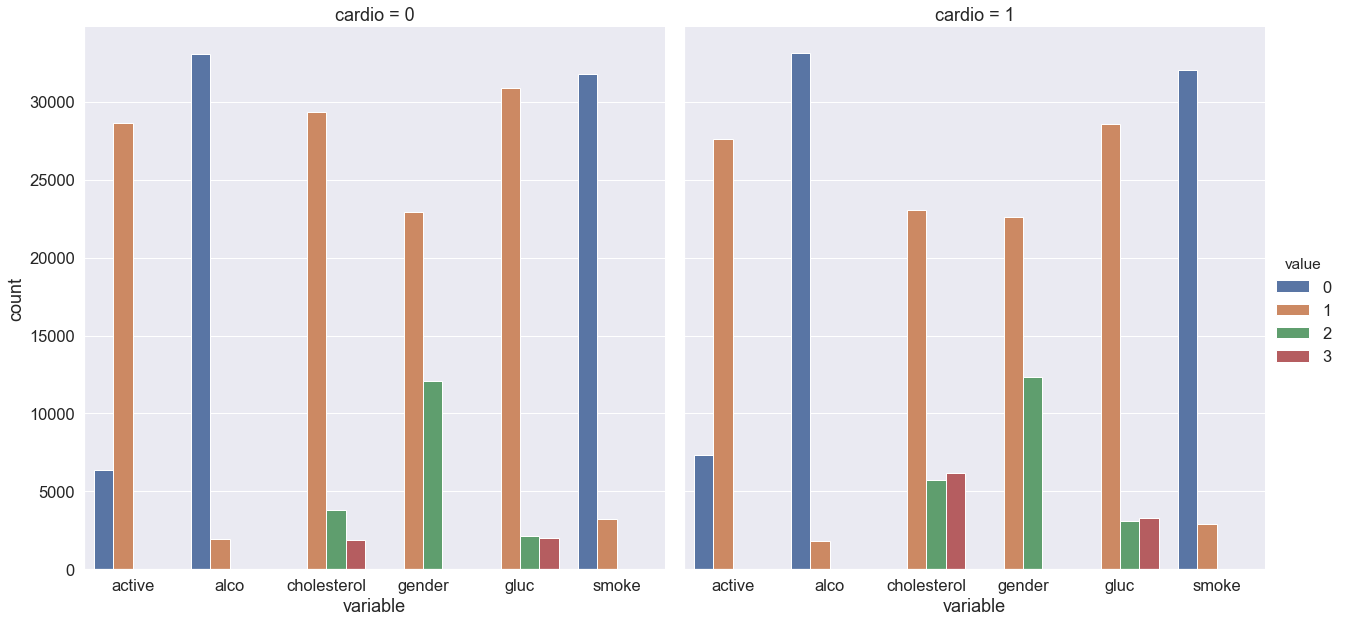

In [6]:
df_uniques = pd.melt(frame=df, value_vars=['gender', 'cholesterol',
                                           'gluc', 'smoke', 'alco',
                                           'active'], id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value',
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.catplot(x='variable', y='count', hue='value',
            col='cardio', data=df_uniques, kind='bar', height=9)

In [7]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [8]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

In [9]:
df.groupby('gender')['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [10]:
round(100 * (df.loc[df['gender'] == 2, 'smoke'].mean() -
             df.loc[df['gender'] == 1, 'smoke'].mean()))

20

In [11]:
df.groupby('smoke')['age'].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [12]:
(df[df['smoke'] == 0]['age'].median() -
 df[df['smoke'] == 1]['age'].median()) / 365.25 * 12

19.613963039014372

In [14]:
df['age_years'] = (df['age'] / 365.25).round().astype('int')

In [15]:
df['age_years'].max()

65

In [16]:
smoking_old_men = df[(df['gender'] == 2) & (df['age_years'] >= 60)
                     & (df['age_years'] < 65) & (df['smoke'] == 1)]

In [17]:
smoking_old_men[(smoking_old_men['cholesterol'] == 1) &
                (smoking_old_men['ap_hi'] < 120)]['cardio'].mean()

0.2631578947368421

In [18]:
smoking_old_men[(smoking_old_men['cholesterol'] == 3) &
                (smoking_old_men['ap_hi'] >= 160) &
                (smoking_old_men['ap_hi'] < 180)]['cardio'].mean()

0.8636363636363636

In [19]:
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2

In [20]:
df['BMI'].median()

26.374068120774975

In [21]:
df.groupby('gender')['BMI'].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [22]:
df.groupby(['gender', 'alco', 'cardio'])['BMI'].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

In [23]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

In [24]:
1 - filtered_df.shape[0] / df.shape[0]

0.09630000000000005

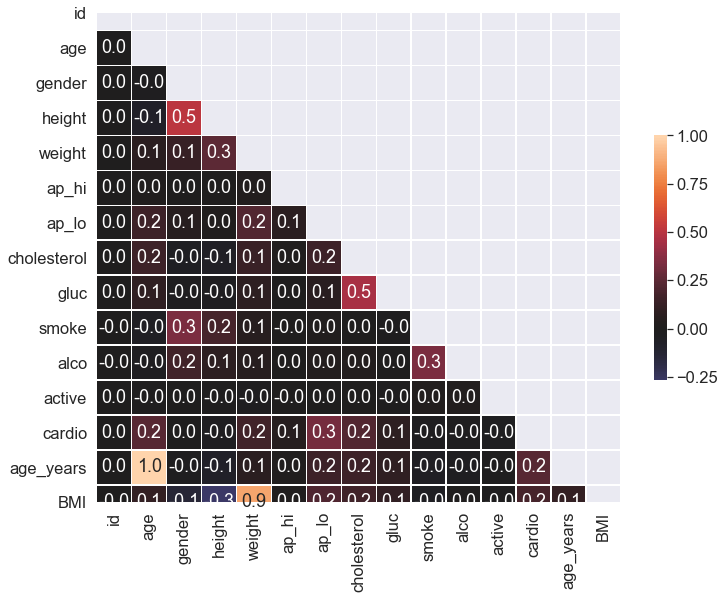

In [25]:
df = filtered_df.copy()

corr = df.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

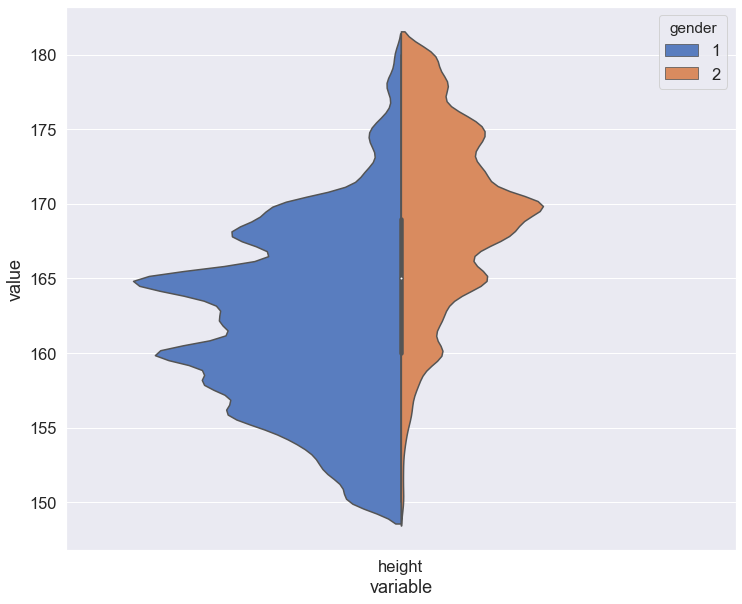

In [26]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable',
    y='value',
    hue='gender',
    palette="muted",
    split=True,
    data=df_melt,
    scale='count',
    scale_hue=False
)

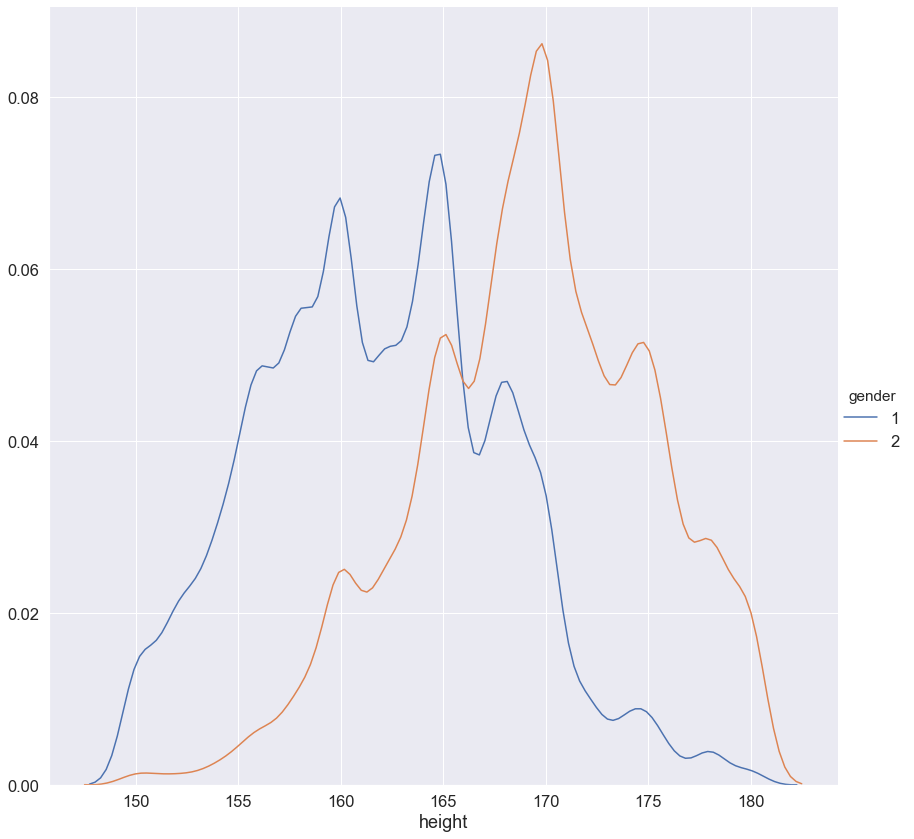

In [27]:
sns.FacetGrid(df, hue="gender", height=12) \
   .map(sns.kdeplot, "height").add_legend()

In [28]:
corr = df[['id', 'age', 'height', 'weight',
           'ap_hi', 'ap_lo', 'cholesterol',
           'gluc']].corr(method='spearman')

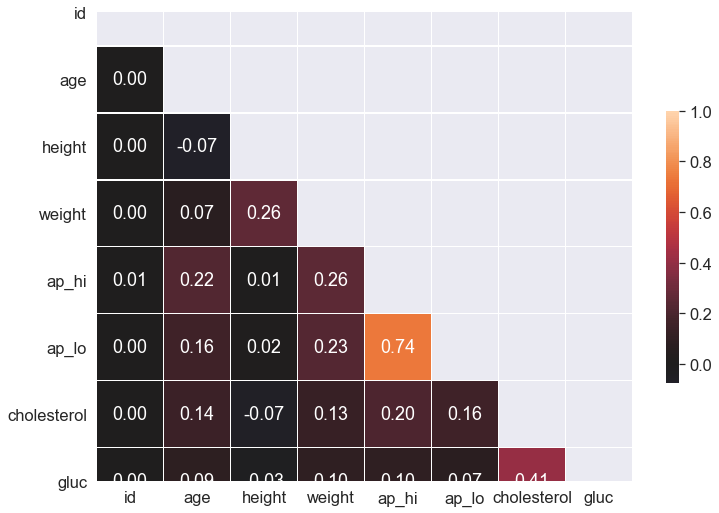

In [29]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

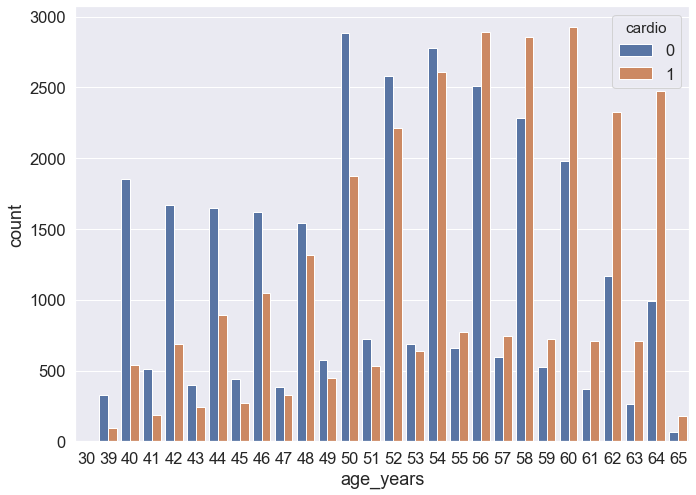

In [30]:
sns.countplot(x="age_years", hue='cardio', data=df)